# Automation (EDA), with the Sweetviz Library¶

                  Homicide rate, suicide rate and GDP
 The Dataset is composed of ten columns, namely: country/region


country	, iso3c, iso2c, year,	Intentional homicides (per 100,000 people)	,Suicide mortality rate (per 100,000 population),  GDP (current US$) GDP per capita, PPP (current international $)	, adminregion ,	incomeLevel .



Data source:https://data.worldbank.org/


# importing modules and loading the dataset


In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sweetviz as sv
df_suicide= pd.read_csv("C:/Users/Marztec Tecnologia/Downloads/suicide homicide gdp.csv")
df_suicide.head()

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income


 # viewing the last rows of the dataset


In [5]:
df_suicide.tail()

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
13561,Zimbabwe,ZWE,ZW,2016,NaN,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,NaN,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,NaN,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,NaN,14.1,1.928429e+10,3783.547898,Sub-Saharan Africa (excluding high income),Lower middle income
13565,Zimbabwe,ZWE,ZW,2020,NaN,NaN,1.805117e+10,3537.351394,Sub-Saharan Africa (excluding high income),Lower middle income


# Automating exploratory data analysis (EDA)

In [34]:
my_report = sv.analyze(df_suicide)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# What are the ten countries with the highest homicide rates?

In [12]:
df_mean_country =  df_suicide.groupby(["country","iso3c","incomeLevel"])["Intentional homicides (per 100,000 people)"].mean().reset_index()
top_ten_hom = df_mean_country.sort_values("Intentional homicides (per 100,000 people)", ascending=False).head(10)
top_ten_hom

,country,iso3c,incomeLevel,"Intentional homicides (per 100,000 people)"
68,El Salvador,SLV,Lower middle income,74.178298
47,Colombia,COL,Upper middle income,50.995671
102,Honduras,HND,Lower middle income,47.886130
218,South Africa,ZAF,Upper middle income,42.120833
119,Jamaica,JAM,Upper middle income,40.821295
137,Lesotho,LSO,Lower middle income,36.920896
256,"Venezuela, RB",VEN,Not classified,36.431583
258,Virgin Islands (U.S.),VIR,High income,35.765492
177,Nigeria,NGA,Lower middle income,34.524046
95,Guatemala,GTM,Upper middle income,33.251046


# graphically view the top ten countries with the highest homicide rates

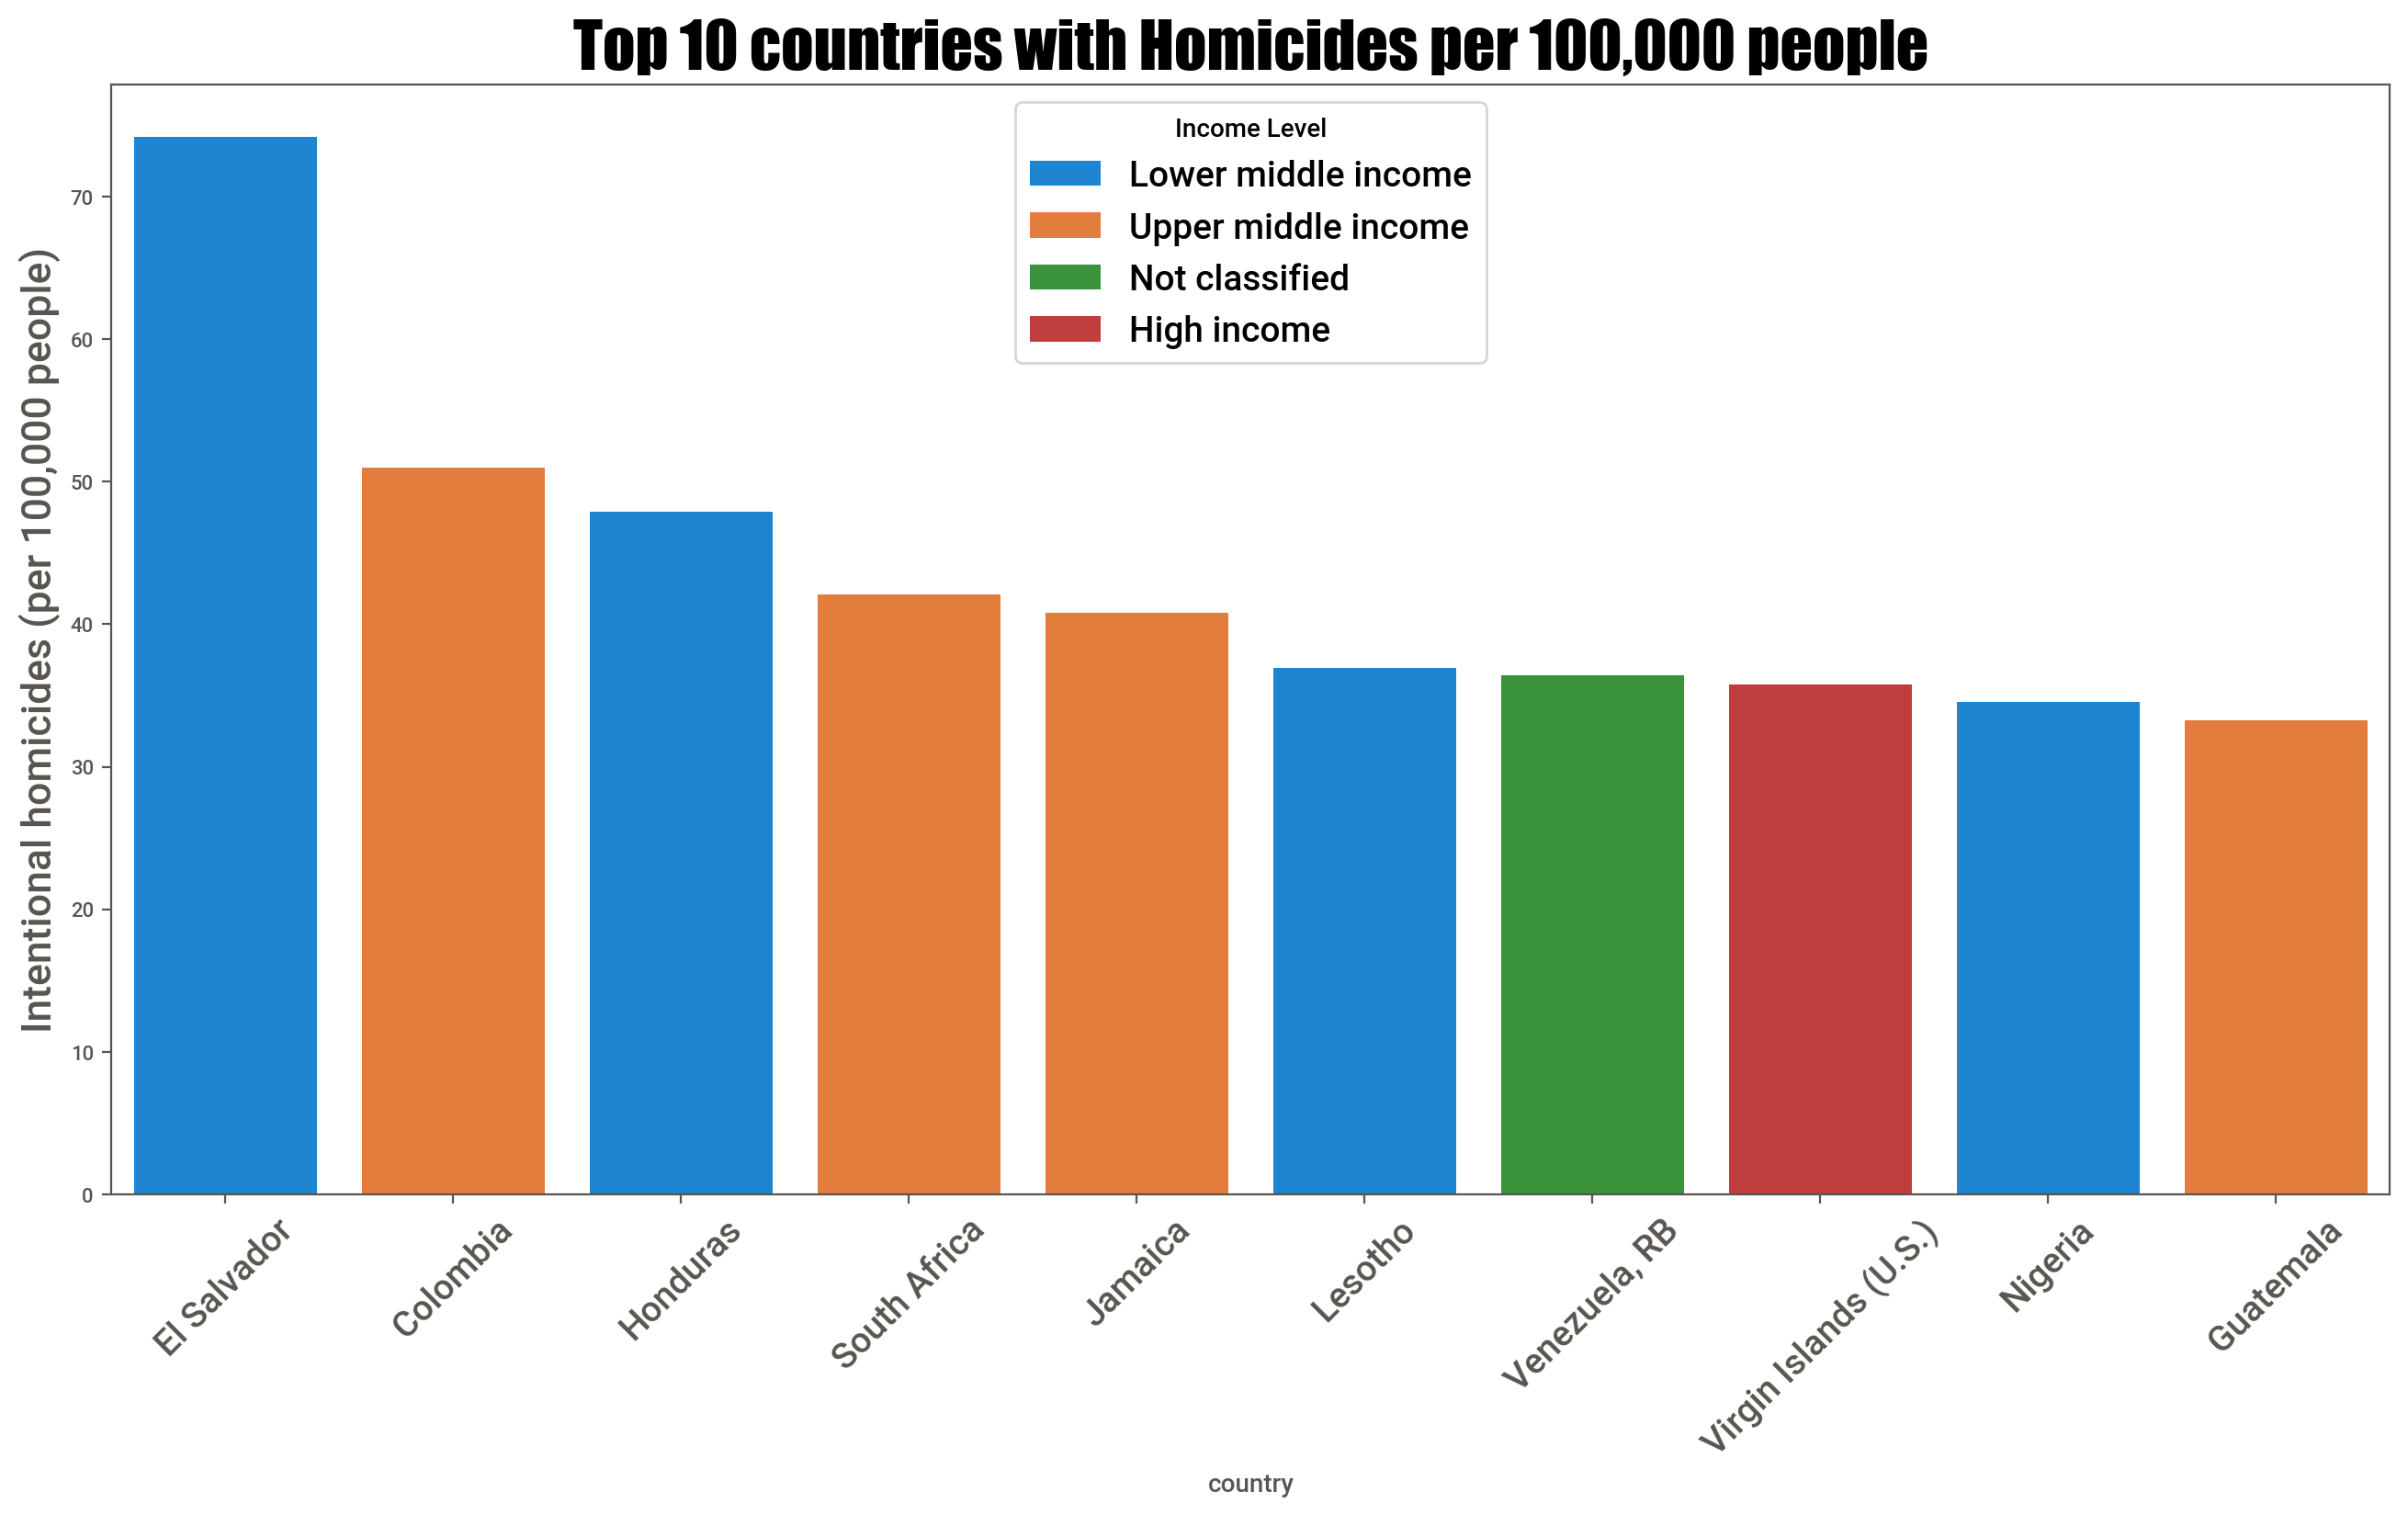

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8), dpi=200)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel("Suicide mortality rate", fontsize=16, weight = "bold")
plt.title("Top 10 countries with Homicides per 100,000 people", fontname="Impact", fontsize=25)
sns.barplot(data = top_ten_hom, y= "Intentional homicides (per 100,000 people)", x = "country", hue="incomeLevel", 
            dodge=False)
plt.legend(fontsize=14, title="Income Level")

# What are the ten countries with the highest suicide rates?

In [18]:
df_mean_country =  df_suicide.groupby(["country","iso3c", "incomeLevel"])["Suicide mortality rate (per 100,000 population)"].mean().reset_index()
top_ten_sui = df_mean_country.sort_values("Suicide mortality rate (per 100,000 population)", ascending=False).head(10)
top_ten_sui

,country,iso3c,incomeLevel,"Suicide mortality rate (per 100,000 population)"
137,Lesotho,LSO,Lower middle income,59.570
72,Eswatini,SWZ,Lower middle income,41.000
201,Russian Federation,RUS,Upper middle income,39.720
141,Lithuania,LTU,High income,37.980
98,Guyana,GUY,Upper middle income,34.575
20,Belarus,BLR,Upper middle income,34.040
122,Kazakhstan,KAZ,Upper middle income,30.695
124,Kiribati,KIR,Lower middle income,30.085
248,Ukraine,UKR,Lower middle income,27.905
126,"Korea, Rep.",KOR,High income,26.750


# graphically view the top ten countries with the highest suicide rates

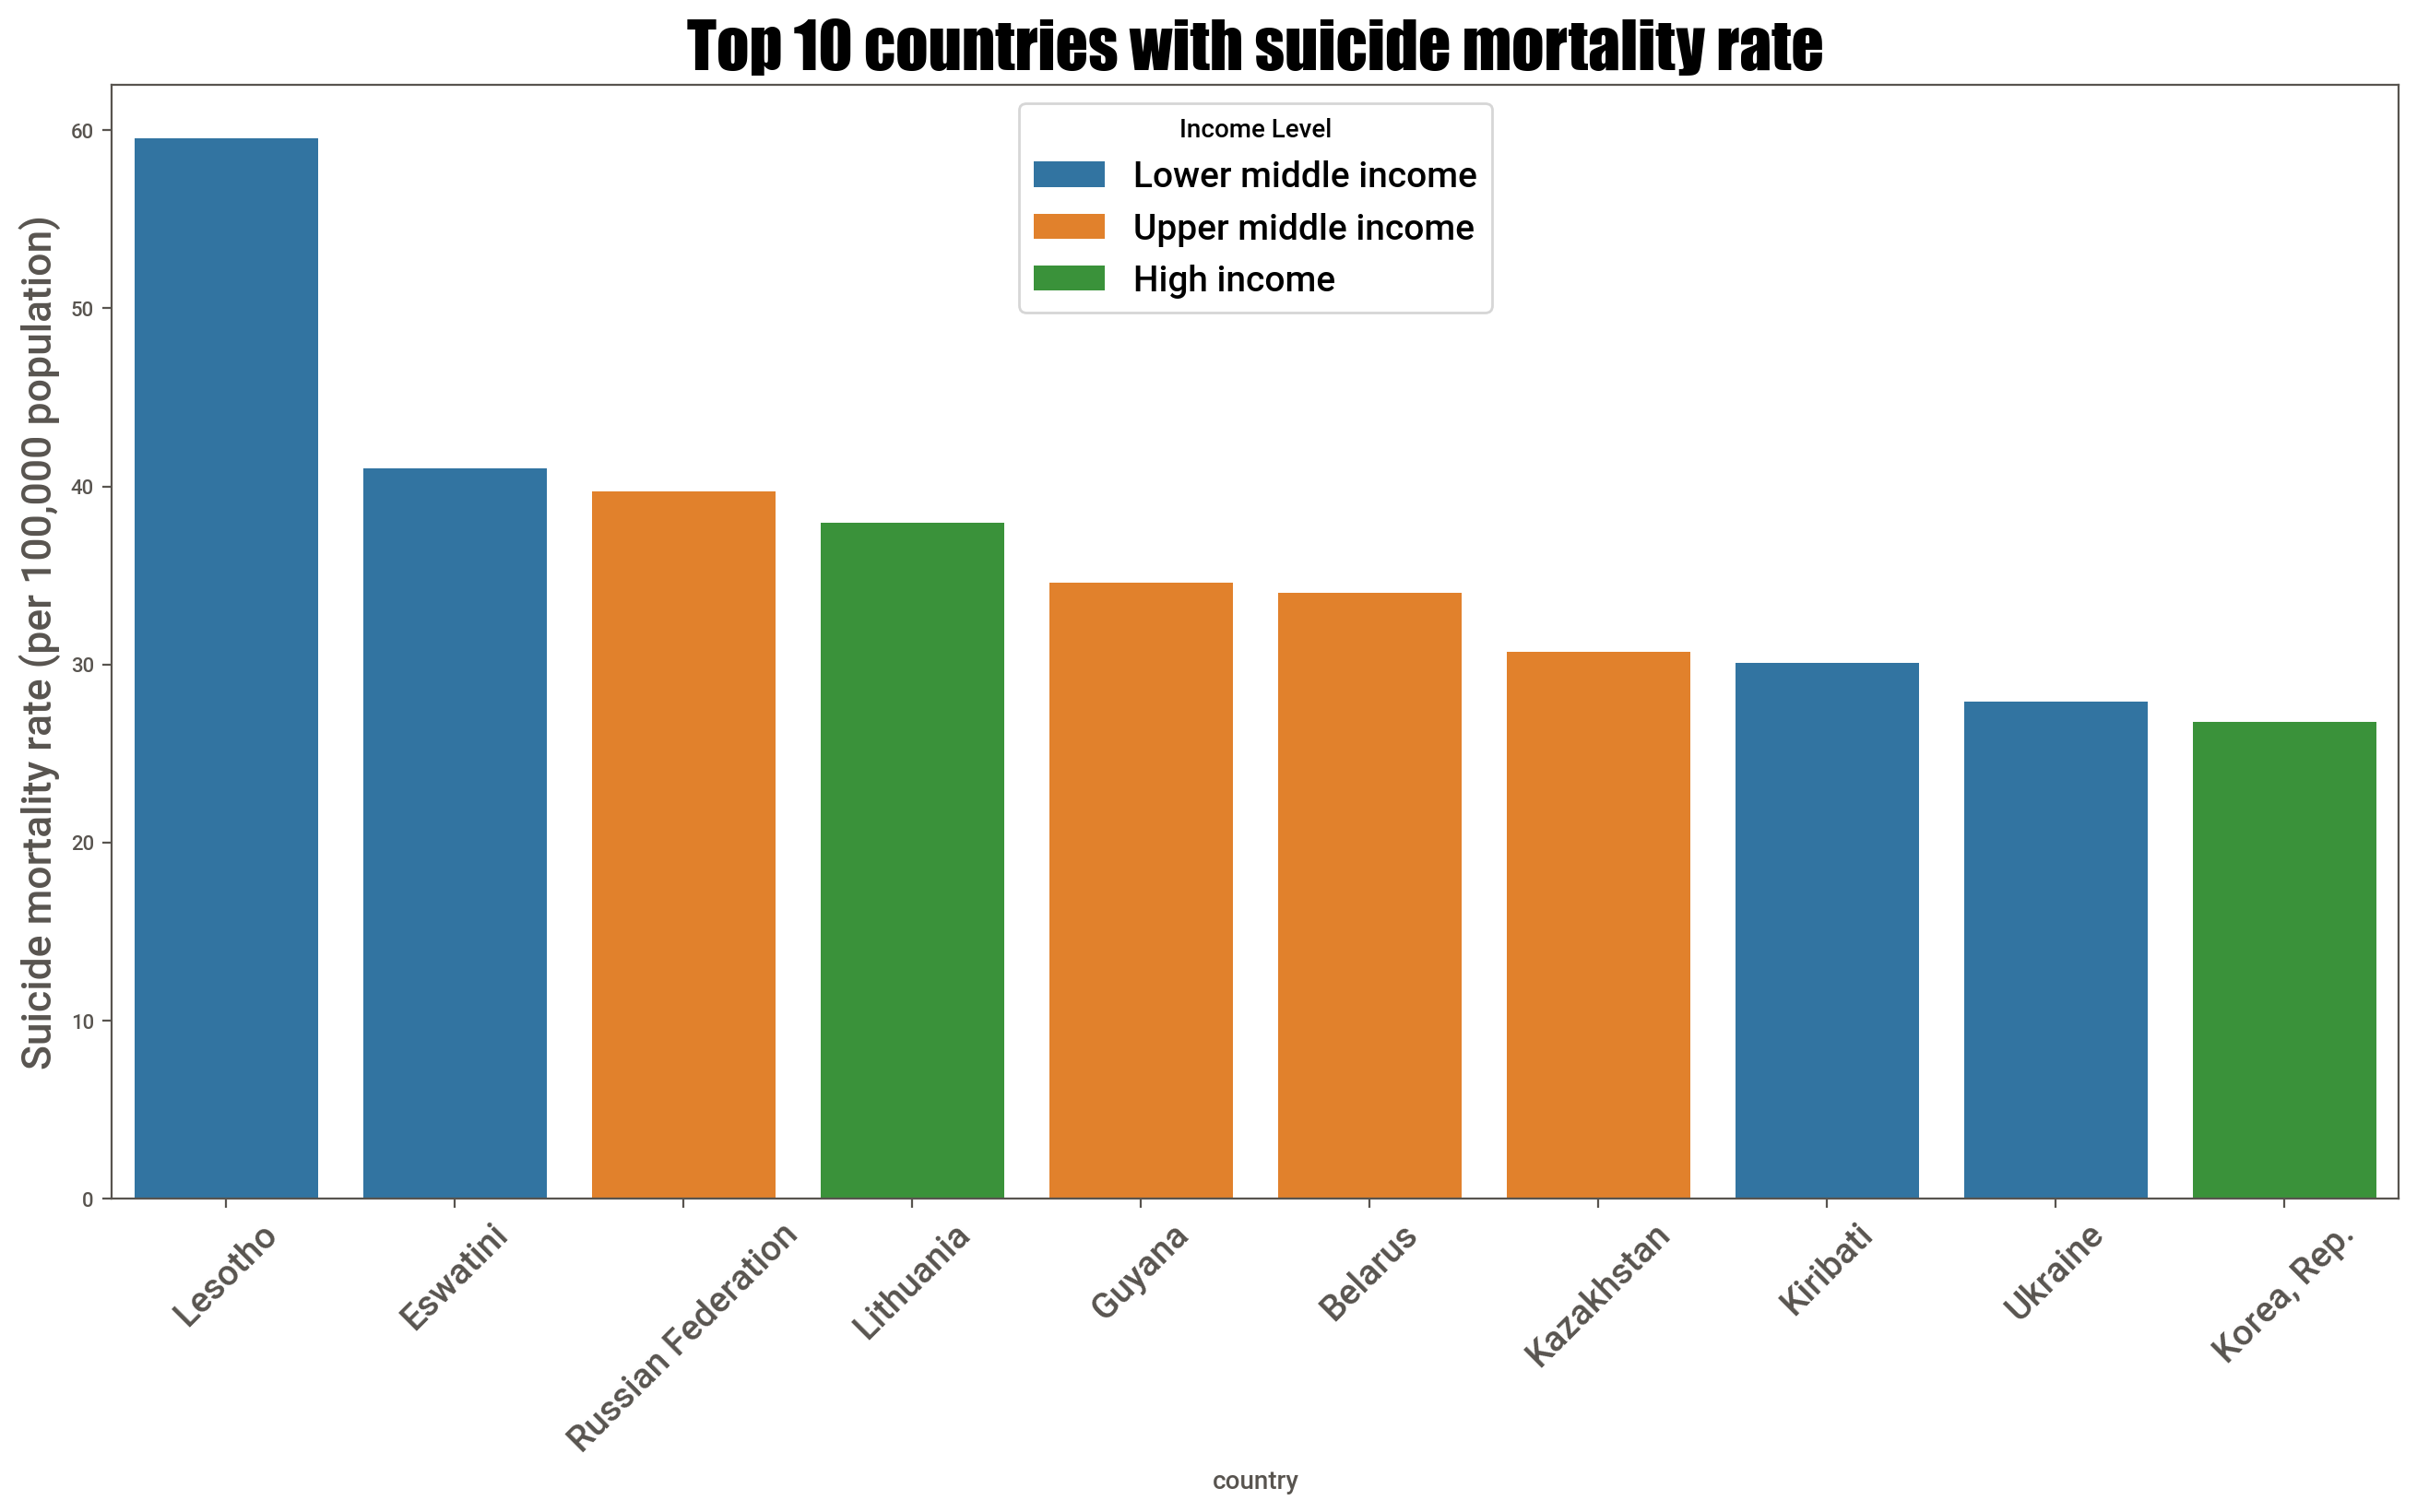

In [19]:
plt.figure(figsize=(16,8), dpi=200)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel("Suicide mortality rate", fontsize=16, weight = "bold")
plt.title("Top 10 countries with suicide mortality rate", fontname="Impact", fontsize=25)
sns.barplot(data =top_ten_sui, y = "Suicide mortality rate (per 100,000 population)", 
            x ="country", hue="incomeLevel", dodge=False, palette="tab10")
plt.legend(fontsize=14, title="Income Level")

# interactive data visualization using the plotly library

In [31]:
df_homicides = df_suicide.copy()
df_homicides = df_homicides.dropna(subset=['Intentional homicides (per 100,000 people)'])
df_homicides.rename( columns={ 'Intentional homicides (per 100,000 people)' : 'IH' } ,inplace=True)
fig = px.choropleth(df_homicides, locations='iso3c', color='IH',
                           color_continuous_scale="Reds", hover_data = ['country', 'IH'],
                    projection = 'miller',
                            animation_frame="year",
                           range_color=(0, 12),
                    title = 'Suicide mortality rate')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [32]:
Admin_Ih = df_homicides.groupby(["year", "adminregion"])["IH"].mean().reset_index()

In [33]:
fig = px.bar(Admin_Ih, x='IH', y='adminregion',
             title='Mean intentional homicides over the year',animation_frame="year", color = 'adminregion', text_auto='.2s')
fig.update_layout(showlegend=False)
fig.show()

# In short : There is a clear negative connection between GDP per capita and homicides, and GDP per capita and suicides. That is to say the smaller the GDP per capita for a country, the more likely is that a citizen of that country will commit homicide or suicide. This connection is stronger for GDP per capita and homicides.